In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos que se encuentran en un CSV
datos = pd.read_csv('mushrooms.csv')

# Verificar que no hayan datos faltantes 

In [3]:
# verificamos que en cada columna no haya datos faltantes
print(datos.isnull().sum())
# vemoslas etiquetas de las clases
print(datos['class'].unique())
# vemos el tamano de las caracteristicas mas las etiquetas
print(datos.shape)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
['p' 'e']
(8124, 23)


# Para verificar que columnas son categóricas

In [4]:
# verificamos que columnas son de tipo categoricos
s = (datos.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
# vemos cuantas columnas son categoricas
print(len(object_cols))

Categorical variables:
['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
23


In [5]:
# observamos las primeras filas del dataframe
datos.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Convertimos los datos categóricos a numéricos

In [6]:
# convertimos cada una de las columnas en numericas con el metodo ordinario
datos1 = datos.copy()
for col in datos.columns:
    datos1[col] = LabelEncoder().fit_transform(datos[col])
datos1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Text(0.5, 1.0, 'class')

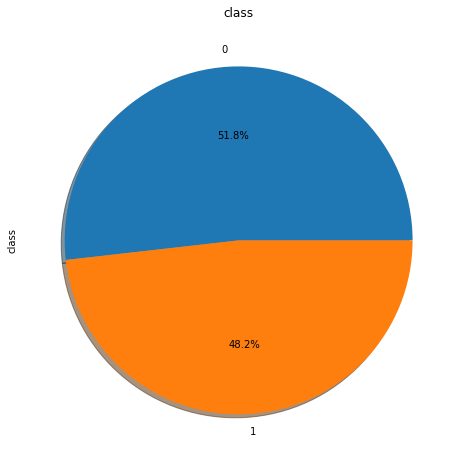

In [7]:
# visualizamos que el conjunto de las etiquetas se encuentre "balanceado"
plt.figure(figsize=(18,8))

datos1['class'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=True)
plt.title('class')

In [8]:
#dividimos las caracteristicas de las etiquetas
X = datos1.drop(['class'], axis = 1)
y = datos1['class']

In [9]:
# verificamos que columna de las caracteristicas no son informativas, ya que tienen arianza cero
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [10]:
# imprimimos las caracteristicas con varianza igual a cero
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

1


['veil-type']

In [11]:
# Verificamos cuantas caracteristicas tienen varianza distinta de cero
sum(sel.get_support())

21

In [12]:
# eliminamos la columna de caracteristicas que no es informativa
X = X.drop(['veil-type'], axis=1)
X1= X.copy()

In [13]:
#estandarizamos las caracteristicas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [35]:
#guardamos los parametros que realizan la estandarizacion
import numpy as np
np.save('mean',scaler.mean_)
np.save('std',scaler.scale_)

In [36]:
# dividimos los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [37]:
# verificamos que las divion de datos tengan clases balanceadas
import numpy as np
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([2509, 2365]))
(array([0, 1]), array([1699, 1551]))


In [38]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(4874, 21) (3250, 21) (4874,) (3250,)


In [39]:
# instanciamos el modelo de RandomForest para clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix 


clf = RandomForestClassifier(n_estimators=90, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with all features : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with all features : 1.0000


In [40]:
# guardamos el modelo a un pickle
import pickle
with open('RandomF_hongos.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(clf, f, pickle.HIGHEST_PROTOCOL)

In [41]:
# esto nos sirve para hacer grid de distints parametros de RandomForestClassifier
# y encontrar la mejor combinacion
model_RR=RandomForestClassifier()
tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
from sklearn.model_selection import RandomizedSearchCV
RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)
RR_model.fit(X_train,y_train)
print(RR_model.best_score_)
print(RR_model.best_params_)



0.9993839835728953
{'n_estimators': 40, 'min_samples_leaf': 10, 'max_features': 'log2'}


[[1699    0]
 [   0 1551]]


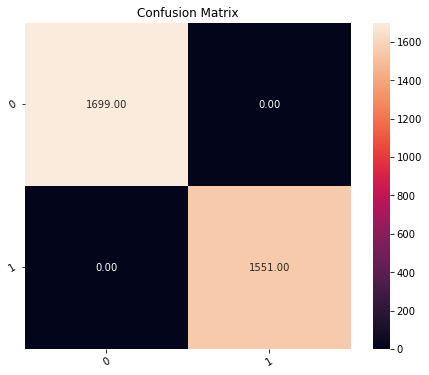

In [42]:
# evaluamos el modelo ya entrenado
import matplotlib.pyplot as plt
c_matrix=confusion_matrix(y_test,y_pred)
print(c_matrix)

# graficamos la matriz de confusion
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix')
a = sns.heatmap(c_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show() 

# Seleccion de caracteristicas

In [43]:
# si tuvieramos un problema con muchas caracteristicas, randomforest tambien nos sirve para elegir cuales son las 
# caracteristicas mas importantes
feature_scores = pd.Series(clf.feature_importances_, index=X1.columns).sort_values(ascending=False)

<AxesSubplot:title={'center':'Importancia de características'}>

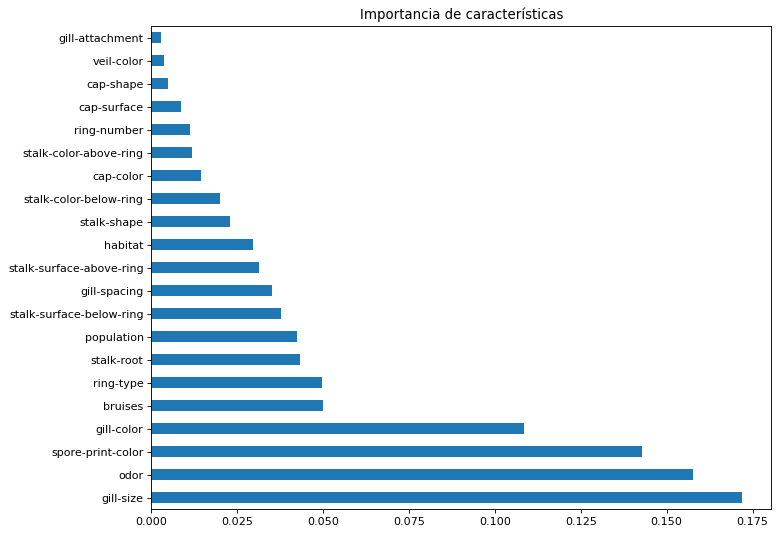

In [44]:

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
plt.title('Importancia de características')

feat_importances = pd.Series(clf.feature_importances_, index= X1.columns)

feat_importances.nlargest(21).plot(kind='barh')


#  Red Neuronal

In [45]:
from sklearn.neural_network import MLPClassifier



In [46]:
mlp = MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [47]:
y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [48]:
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix


array([[1699,    0],
       [   0, 1551]])

In [49]:
X_train.shape

(4874, 21)

# Red Densa tensorflow/keras 

In [50]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [51]:
from keras import models, layers
# se construye el modelo denso
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(17, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
# se le asigna el optimizador y las metricas
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
# seentrena la red densa
history = model.fit(X_train, y_train, epochs=50, batch_size=128)


2022-09-10 10:24:42.327553: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 10:24:42.417580: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
39/39 [==============================] - 1s 1ms/step - loss: 0.6883 - accuracy: 0.6321
Epoch 2/50
39/39 [==============================] - 0s 982us/step - loss: 0.4909 - accuracy: 0.8687
Epoch 3/50
39/39 [==============================] - 0s 977us/step - loss: 0.3143 - accuracy: 0.9046
Epoch 4/50
39/39 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9185
Epoch 5/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9350
Epoch 6/50
39/39 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.9565
Epoch 7/50
39/39 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9758
Epoch 8/50
39/39 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9801
Epoch 9/50
39/39 [==============================] - 0s 951us/step - loss: 0.0591 - accuracy: 0.9838
Epoch 10/50
39/39 [==============================] - 0s 944us/step - loss: 0.0460 - accuracy: 0.9879
Epoch 11/50

In [52]:
# evaluamos el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 636us/step - loss: 5.9246e-04 - accuracy: 1.0000


In [54]:
print(test_loss)
print(test_accuracy)

0.0005924610886722803
1.0


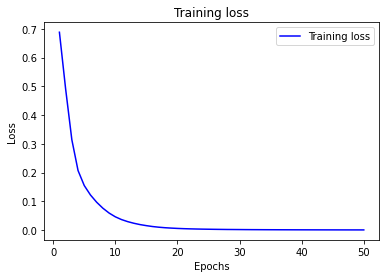

In [55]:
# grafica con la función de costo
loss = history.history['loss']
#val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

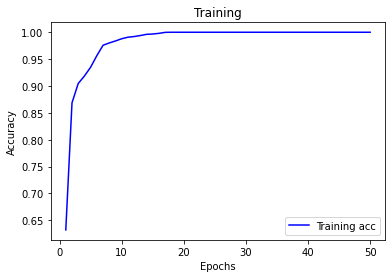

In [56]:
plt.clf()
acc = history.history['accuracy']
#val_acc = train_log.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
predictions = model.predict(X_test)
y_pred =np.argmax(predictions,1)

In [58]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [59]:
y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [60]:
# guardamos el modelo de la red neuronal
model.save('red_hongos.h5')